# **CarClassifyRF (Random Forest Classifier)**

# **Purpose Of Model**

The purpose of this machine learning model is to classify cars into categories of 'DEMO,' 'NEW,' or 'USED' based on various features such as year, cylinders, price, and other relevant attributes.

**Model Details:** Algorithm: Random Forest Classifier

**Features:** Year, Cylinders, Price, FuelType, DriveType, Transmission, BodyType, ColourExt, ColourInt, City, State, Model, Brand

**Target Variable:** UsedOrNew

**Accuracy and Evaluation:**

**Accuracy:** Achieved an accuracy of 97% on the test set.

**Confusion Matrix:** Provides detailed breakdown of true positives, true negatives, false positives, and false negatives.

**Classification Report:** Includes precision, recall, and F1-score for each class.

# **Importing Necessary Libraries**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/Australian Vehicle Prices.csv')
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [4]:
df.shape

(16734, 19)

In [5]:
df['Brand'].unique()

array(['Ssangyong', 'MG', 'BMW', 'Mercedes-Benz', 'Renault', 'Toyota',
       'Land', 'Nissan', 'Honda', 'Volkswagen', 'Mitsubishi', 'Ford',
       'Subaru', 'Hyundai', 'Jeep', 'Volvo', 'Mazda', 'Abarth', 'Holden',
       'Audi', 'Kia', 'Mini', 'Peugeot', 'Suzuki', 'Dodge', 'Porsche',
       'Daihatsu', 'Isuzu', 'Lexus', 'Jaguar', 'Rolls-Royce', 'Skoda',
       'Fiat', 'Haval', 'Citroen', 'LDV', 'HSV', 'Foton', 'Mahindra',
       'Maserati', 'Alfa', 'GWM', 'Ram', 'Tesla', 'Genesis', 'Chrysler',
       'Great', 'Opel', 'Saab', 'Bentley', 'Rover', nan, 'Ferrari',
       'Cupra', 'Chevrolet', 'Lamborghini', 'FPV', 'McLaren', 'Chery',
       'Iveco', 'Hummer', 'Infiniti', 'BYD', 'Tata', 'Aston', 'Daewoo',
       'Proton', 'Geely', 'Smart', 'Ineos', 'Caterham', 'Hino',
       'International', 'Lotus', 'Polestar', 'Datsun', 'Packard'],
      dtype=object)

In [6]:
df.isnull().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [7]:
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

In [8]:
df['UsedOrNew'].unique()

array(['DEMO', 'USED', 'NEW', nan], dtype=object)

In [9]:
df[['Cylinders', 'Liters']] = df['Engine'].str.extract(r'(\d+) cyl, (\d+\.\d+) L').astype({0: 'float', 1: 'float'})
df['Cylinders'].fillna(0, inplace=True)
df['Cylinders'] = df['Cylinders'].astype(int)
df.drop(columns=['Engine'], inplace=True)

In [10]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Cylinders,Liters
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990,4,2.2
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990,4,1.5
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988,0,NaN
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990,8,5.5
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990,4,1.3


In [11]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Cylinders,Liters
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990,4,2.2
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990,4,1.5
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988,0,NaN
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990,8,5.5
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990,4,1.3


In [12]:
df['FuelConsumption'] = df['FuelConsumption'].str.split().str[0]

In [13]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Cylinders,Liters
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990,4,2.2
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990,4,1.5
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988,0,NaN
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,11,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990,8,5.5
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990,4,1.3


In [14]:
df.rename(columns={'FuelConsumption': 'FuelCons/100'}, inplace=True)

In [15]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelCons/100,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Cylinders,Liters
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990,4,2.2
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990,4,1.5
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988,0,NaN
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,11,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990,8,5.5
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990,4,1.3


In [16]:
df[['ColourExt', 'ColourInt']] = df['ColourExtInt'].str.split(' / ', n=1, expand=True)

In [17]:
df = df.drop(columns=['ColourExtInt'])

In [18]:
df.head(2)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelCons/100,...,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Cylinders,Liters,ColourExt,ColourInt
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,...,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990,4,2.2,White,Black
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,...,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990,4,1.5,Black,Black


In [19]:
df[['City', 'State']] = df['Location'].str.split(', ', n=1, expand=True)

In [20]:
df = df.drop(columns=['Location'])


In [21]:
df['Doors'] = df['Doors'].str.replace('Doors', '').str.strip()

In [22]:
df['Seats'] = df['Seats'].str.replace('Seats', '').str.strip()

In [23]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelCons/100,...,BodyType,Doors,Seats,Price,Cylinders,Liters,ColourExt,ColourInt,City,State
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,...,SUV,4,7,51990,4,2.2,White,Black,Caringbah,NSW
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,...,Hatchback,5,5,19990,4,1.5,Black,Black,Brookvale,NSW
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,...,Coupe,2,4,108988,0,NaN,Grey,White,Sylvania,NSW
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,11,...,Coupe,2,4,32990,8,5.5,White,Brown,Mount Druitt,NSW
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6,...,SUV,4,5,34990,4,1.3,Grey,Black,Castle Hill,NSW


In [24]:
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
DriveType             object
FuelType              object
FuelCons/100          object
Kilometres            object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
Cylinders              int64
Liters               float64
ColourExt             object
ColourInt             object
City                  object
State                 object
dtype: object

In [25]:
numeric_columns = ['Year', 'FuelCons/100', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats', 'Price']

In [26]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [27]:
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
DriveType             object
FuelType              object
FuelCons/100         float64
Kilometres           float64
CylindersinEngine    float64
BodyType              object
Doors                float64
Seats                float64
Price                float64
Cylinders              int64
Liters               float64
ColourExt             object
ColourInt             object
City                  object
State                 object
dtype: object

In [28]:
columns_to_drop = ['Car/Suv', 'Title']
df = df.drop(columns=columns_to_drop)

In [29]:
columns_to_drop = ['CylindersinEngine']
df = df.drop(columns=columns_to_drop)

In [30]:
df.head()

,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelCons/100,Kilometres,BodyType,Doors,Seats,Price,Cylinders,Liters,ColourExt,ColourInt,City,State
0,Ssangyong,2022.0,Rexton,DEMO,Automatic,AWD,Diesel,8.7,5595.0,SUV,4.0,7.0,51990.0,4,2.2,White,Black,Caringbah,NSW
1,MG,2022.0,MG3,USED,Automatic,Front,Premium,6.7,16.0,Hatchback,5.0,5.0,19990.0,4,1.5,Black,Black,Brookvale,NSW
2,BMW,2022.0,430I,USED,Automatic,Rear,Premium,6.6,8472.0,Coupe,2.0,4.0,108988.0,0,NaN,Grey,White,Sylvania,NSW
3,Mercedes-Benz,2011.0,E500,USED,Automatic,Rear,Premium,11.0,136517.0,Coupe,2.0,4.0,32990.0,8,5.5,White,Brown,Mount Druitt,NSW
4,Renault,2022.0,Arkana,USED,Automatic,Front,Unleaded,6.0,1035.0,SUV,4.0,5.0,34990.0,4,1.3,Grey,Black,Castle Hill,NSW


In [31]:
columns_to_drop = ['Liters']
df = df.drop(columns=columns_to_drop)

In [32]:
df.shape

(16734, 18)

In [33]:
df.isnull().sum()

Brand              1
Year               1
Model              1
UsedOrNew          1
Transmission       1
DriveType          1
FuelType           1
FuelCons/100    1698
Kilometres       592
BodyType         282
Doors           1675
Seats           1705
Price             53
Cylinders          0
ColourExt          1
ColourInt          1
City             450
State            450
dtype: int64

In [34]:
df = df.dropna()

**Final Cleaned DataSet**

In [35]:
df.head()

,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelCons/100,Kilometres,BodyType,Doors,Seats,Price,Cylinders,ColourExt,ColourInt,City,State
0,Ssangyong,2022.0,Rexton,DEMO,Automatic,AWD,Diesel,8.7,5595.0,SUV,4.0,7.0,51990.0,4,White,Black,Caringbah,NSW
1,MG,2022.0,MG3,USED,Automatic,Front,Premium,6.7,16.0,Hatchback,5.0,5.0,19990.0,4,Black,Black,Brookvale,NSW
2,BMW,2022.0,430I,USED,Automatic,Rear,Premium,6.6,8472.0,Coupe,2.0,4.0,108988.0,0,Grey,White,Sylvania,NSW
3,Mercedes-Benz,2011.0,E500,USED,Automatic,Rear,Premium,11.0,136517.0,Coupe,2.0,4.0,32990.0,8,White,Brown,Mount Druitt,NSW
4,Renault,2022.0,Arkana,USED,Automatic,Front,Unleaded,6.0,1035.0,SUV,4.0,5.0,34990.0,4,Grey,Black,Castle Hill,NSW


# **Data Vizualization**

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

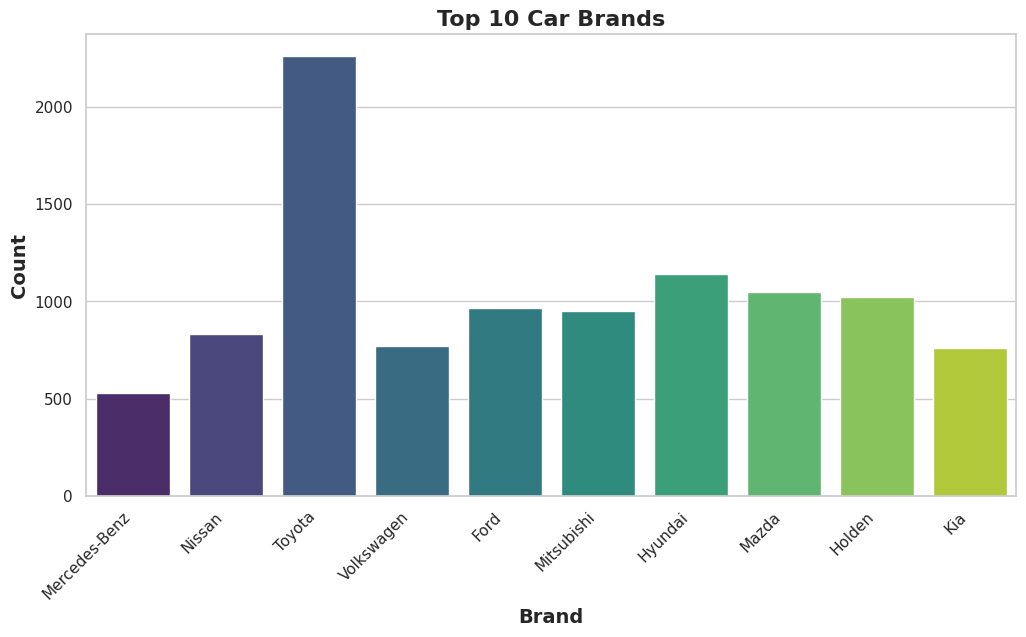

In [37]:
top_brands = df['Brand'].value_counts().nlargest(10).index
df_top_brands = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
brand_count_plot = sns.countplot(x='Brand', data=df_top_brands, palette='viridis')

brand_count_plot.set_title('Top 10 Car Brands', fontsize=16, fontweight='bold')
brand_count_plot.set_xlabel('Brand', fontsize=14, fontweight='bold')
brand_count_plot.set_ylabel('Count', fontsize=14, fontweight='bold')

brand_count_plot.set_xticklabels(brand_count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

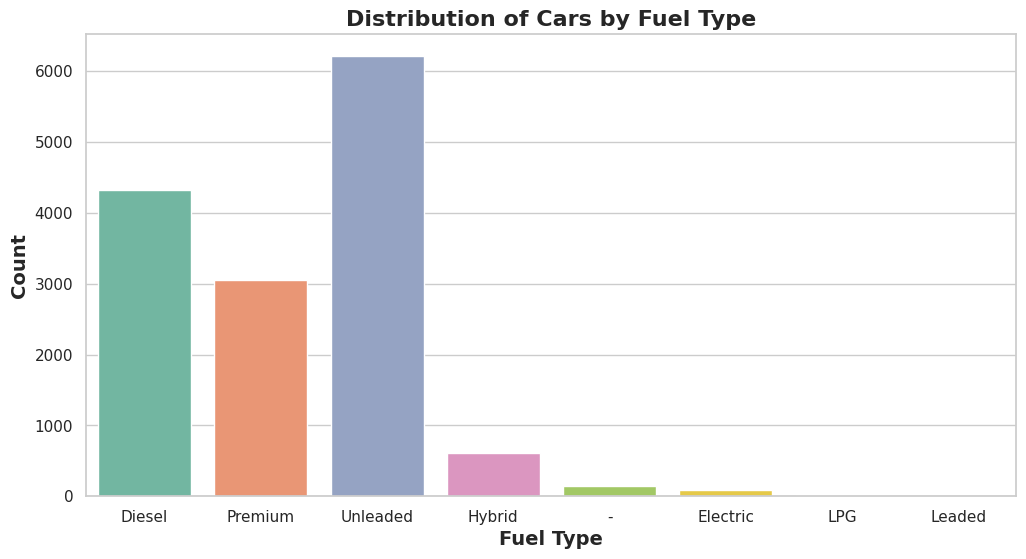

In [38]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
fuel_type_plot = sns.countplot(x='FuelType', data=df, palette='Set2')
fuel_type_plot.set_title('Distribution of Cars by Fuel Type', fontsize=16, fontweight='bold')
fuel_type_plot.set_xlabel('Fuel Type', fontsize=14, fontweight='bold')
fuel_type_plot.set_ylabel('Count', fontsize=14, fontweight='bold')
plt.show()

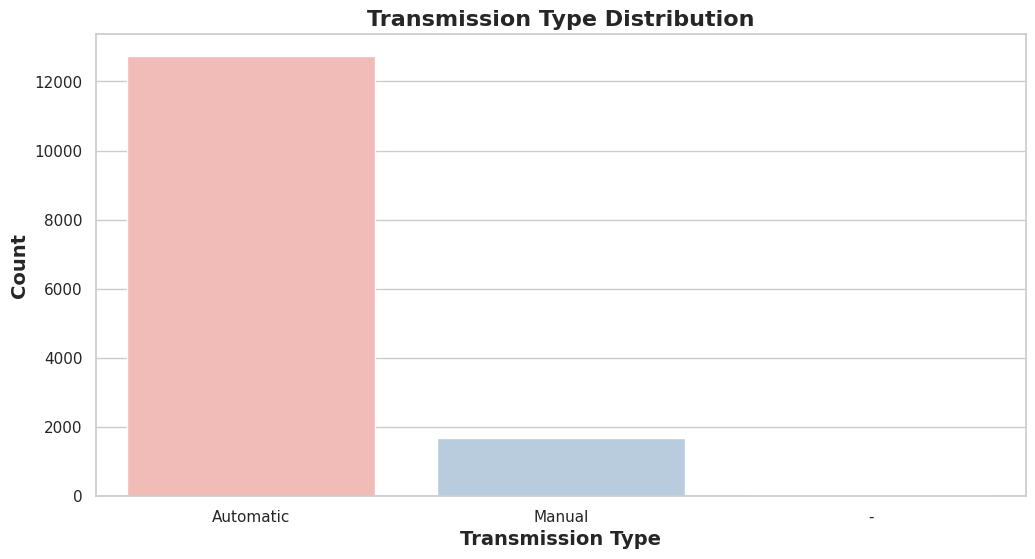

In [39]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
transmission_plot = sns.countplot(x='Transmission', data=df, palette='Pastel1')
transmission_plot.set_title('Transmission Type Distribution', fontsize=16, fontweight='bold')
transmission_plot.set_xlabel('Transmission Type', fontsize=14, fontweight='bold')
transmission_plot.set_ylabel('Count', fontsize=14, fontweight='bold')
plt.show()

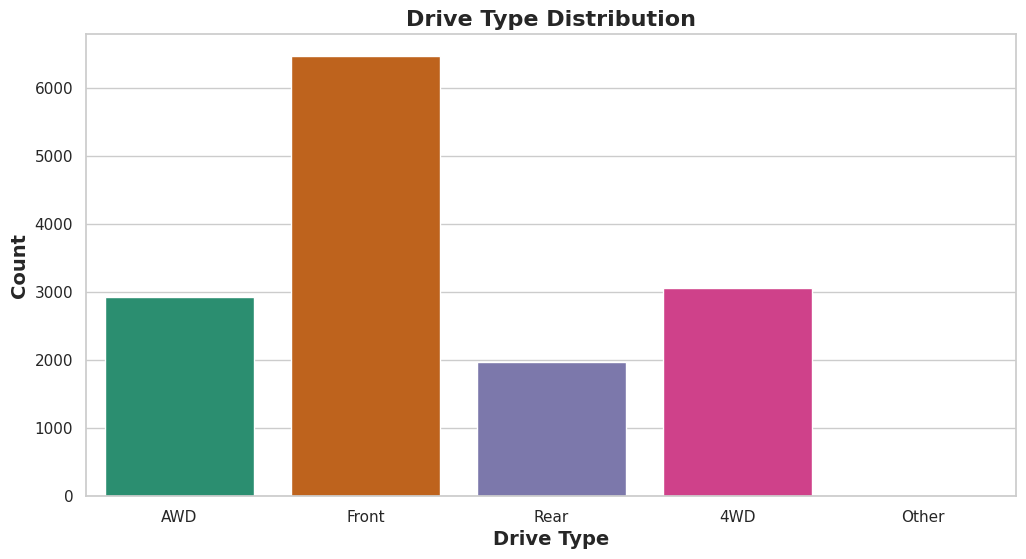

In [40]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
drive_type_plot = sns.countplot(x='DriveType', data=df, palette='Dark2')
drive_type_plot.set_title('Drive Type Distribution', fontsize=16, fontweight='bold')
drive_type_plot.set_xlabel('Drive Type', fontsize=14, fontweight='bold')
drive_type_plot.set_ylabel('Count', fontsize=14, fontweight='bold')
plt.show()

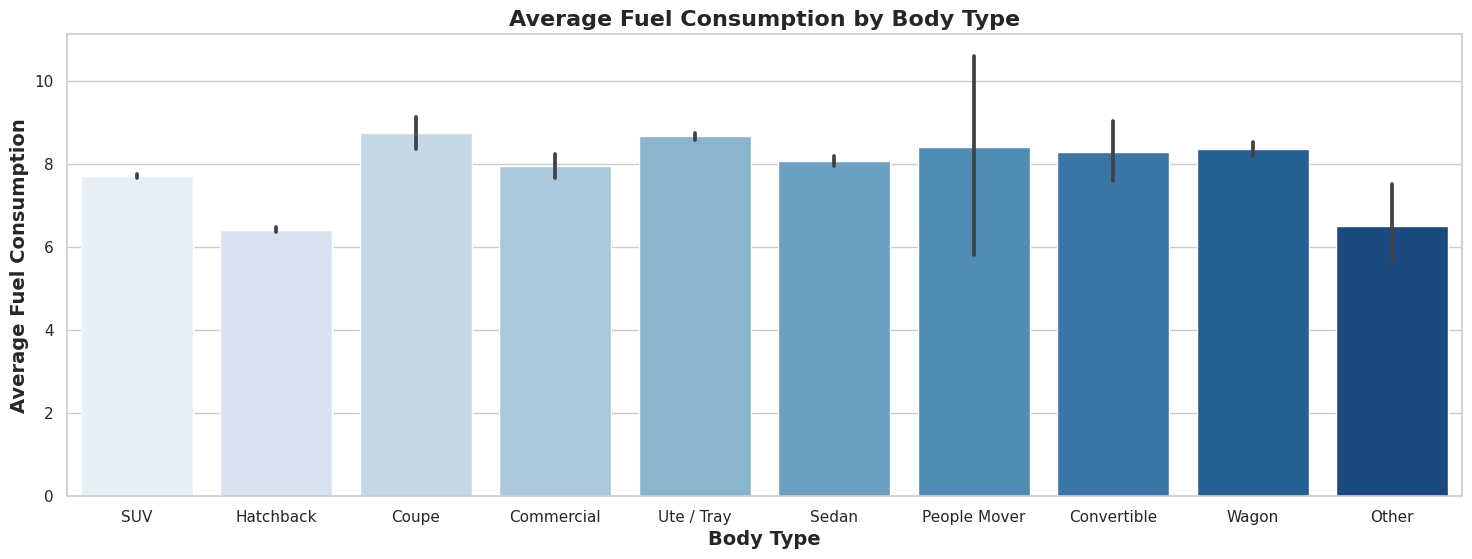

In [41]:
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")
avg_fuel_body_type_plot = sns.barplot(x='BodyType', y='FuelCons/100', data=df, palette='Blues')
avg_fuel_body_type_plot.set_title('Average Fuel Consumption by Body Type', fontsize=16, fontweight='bold')
avg_fuel_body_type_plot.set_xlabel('Body Type', fontsize=14, fontweight='bold')
avg_fuel_body_type_plot.set_ylabel('Average Fuel Consumption', fontsize=14, fontweight='bold')
plt.show()

<ipython-input-42-aa71ae948a7d>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_price_kilometers = sns.scatterplot(x='Price', y='Kilometres', data=df, palette='viridis')


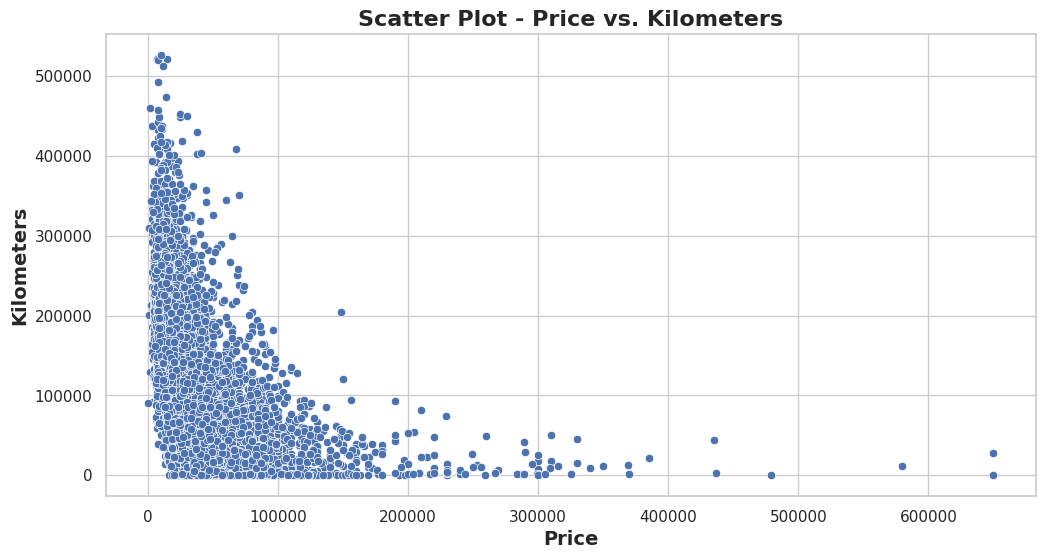

In [42]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
scatter_price_kilometers = sns.scatterplot(x='Price', y='Kilometres', data=df, palette='viridis')
scatter_price_kilometers.set_title('Scatter Plot - Price vs. Kilometers', fontsize=16, fontweight='bold')
scatter_price_kilometers.set_xlabel('Price', fontsize=14, fontweight='bold')
scatter_price_kilometers.set_ylabel('Kilometers', fontsize=14, fontweight='bold')
plt.show()

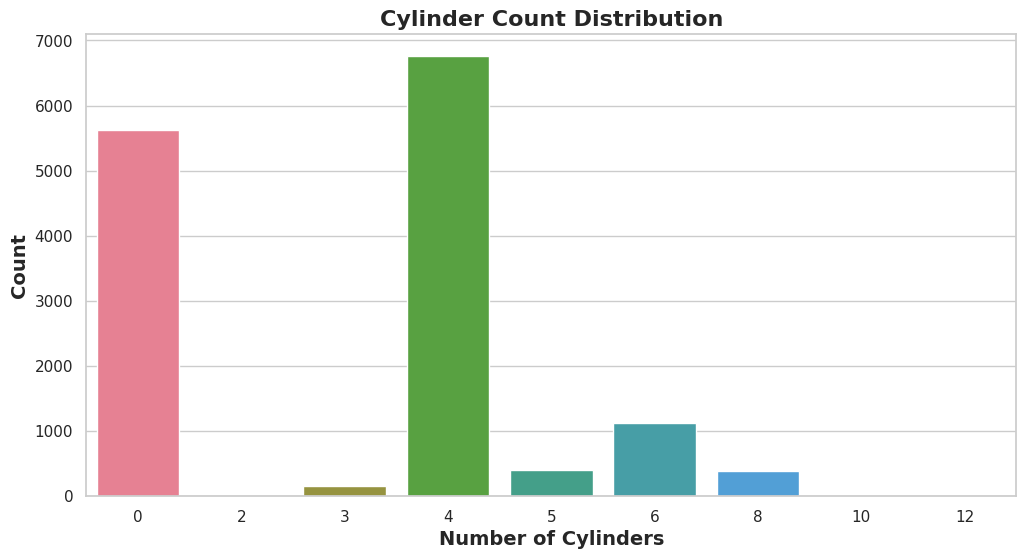

In [43]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
cylinder_count_plot = sns.countplot(x='Cylinders', data=df, palette='husl')
cylinder_count_plot.set_title('Cylinder Count Distribution', fontsize=16, fontweight='bold')
cylinder_count_plot.set_xlabel('Number of Cylinders', fontsize=14, fontweight='bold')
cylinder_count_plot.set_ylabel('Count', fontsize=14, fontweight='bold')
plt.show()

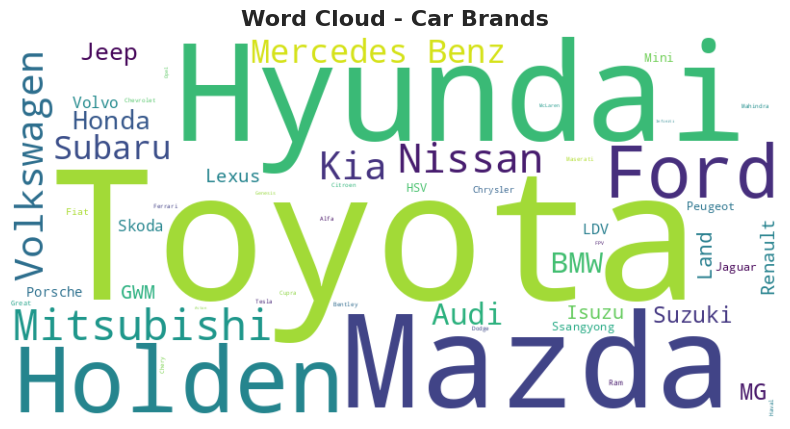

In [44]:
from wordcloud import WordCloud

brand_text = ' '.join(df['Brand'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(brand_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Car Brands', fontsize=16, fontweight='bold')
plt.show()


# **Machine Learning**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [47]:
features = df[['Year', 'Cylinders', 'Price']]
target = df['UsedOrNew']

In [48]:
label_encoder = LabelEncoder()
features['FuelType'] = label_encoder.fit_transform(df['FuelType'])
features['DriveType'] = label_encoder.fit_transform(df['DriveType'])
features['Transmission'] = label_encoder.fit_transform(df['Transmission'])
features['BodyType'] = label_encoder.fit_transform(df['BodyType'])
features['ColourExt'] = label_encoder.fit_transform(df['ColourExt'])
features['ColourInt'] = label_encoder.fit_transform(df['ColourInt'])
features['City'] = label_encoder.fit_transform(df['City'])
features['State'] = label_encoder.fit_transform(df['State'])
features['Model'] = label_encoder.fit_transform(df['Model'])
features['Brand'] = label_encoder.fit_transform(df['Brand'])

<ipython-input-48-dfdaa79158e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['FuelType'] = label_encoder.fit_transform(df['FuelType'])
<ipython-input-48-dfdaa79158e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['DriveType'] = label_encoder.fit_transform(df['DriveType'])
<ipython-input-48-dfdaa79158e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [50]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [53]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.97
Confusion Matrix:
[[  48   30   25]
 [  13   88   10]
 [   7    7 2663]]
Classification Report:
              precision    recall  f1-score   support

        DEMO       0.71      0.47      0.56       103
         NEW       0.70      0.79      0.75       111
        USED       0.99      0.99      0.99      2677

    accuracy                           0.97      2891
   macro avg       0.80      0.75      0.77      2891
weighted avg       0.97      0.97      0.97      2891

